In [3]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as k
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [4]:
img_width,img_height=150,150
train_data_dir=r"/content/drive/MyDrive/research_pro/own/train"
validation_data_dir=r"/content/drive/MyDrive/research_pro/own/valid"

In [5]:

#for setting up input shape
#image_data_format():returns a string that indicates how the backend prefers the image data to be formatted
#'channels_first': repr vesents images with the shape (channels, height, width). channels - no.of color channels: 3-RGB and 1-grayscale images.'channels_last':represents images with shape (h, w, c), which is commonly used in TensorFlow.
import tensorflow.keras.backend as k
if k.image_data_format()=='channel_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

In [6]:
#Augmentation
# configures data generators-used to feed data into a CNN for the tasks of training and validation
#horizontal_flip=True: form of data augmentation
batch_size=35
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
#load images from the specified directories and automatically apply the transformations specified in the ImageDataGenerator.
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,#no.of img in each batch:35
                                                  class_mode='binary',
                                                  classes=['defect','good'])

validation_generator=test_datagen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 197 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


In [7]:
#maps the class labels (as strings) to their corresponding integer indices
train_generator.class_indices

{'defect': 0, 'good': 1}

In [8]:
validation_generator.class_indices

{'defect': 0, 'good': 1}

In [9]:
#gives numerical array where each number corresponds to a class based on the order defined
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [10]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

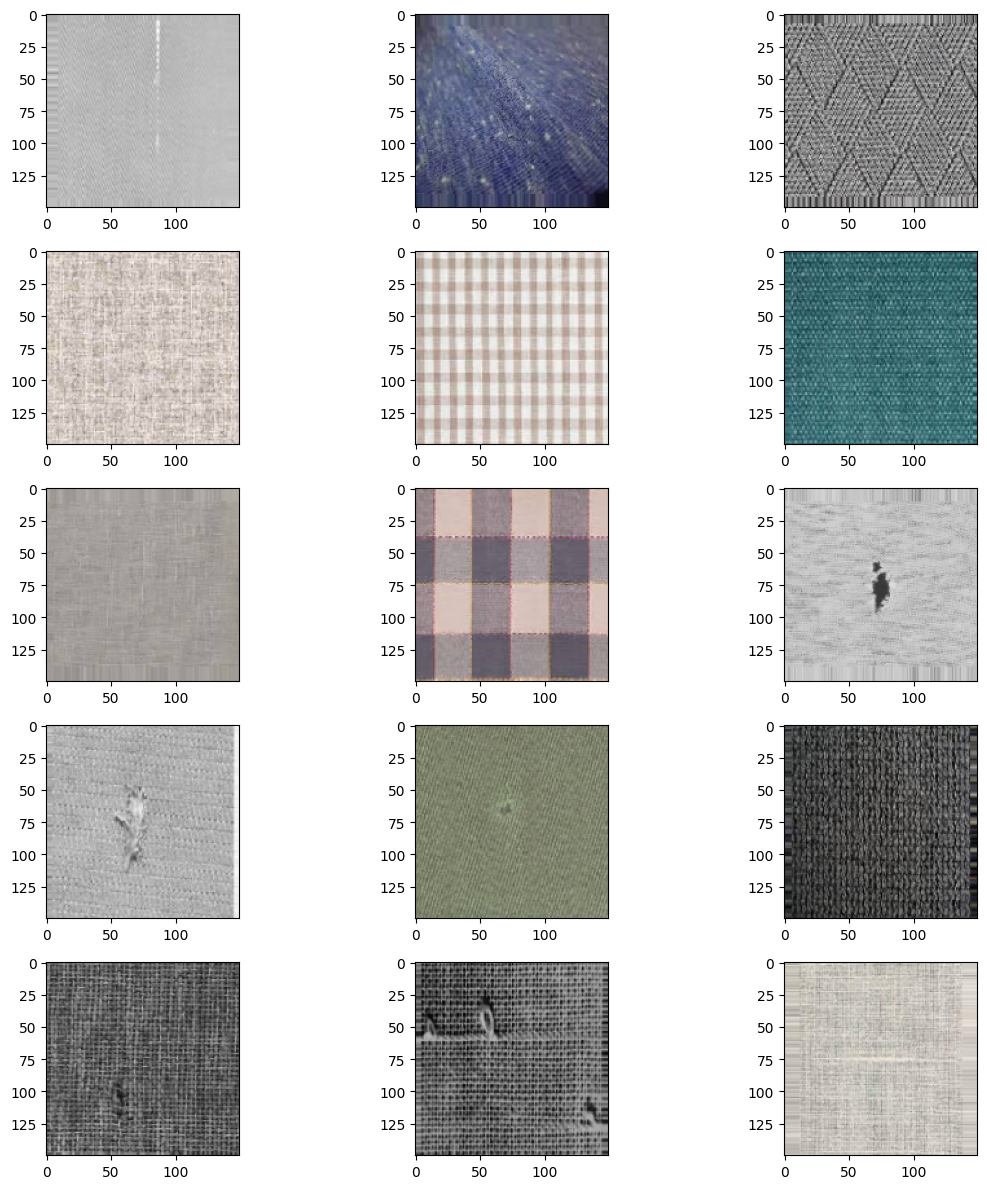

In [11]:
#displays a grid of images from training dataset
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)#5-rows;3-cols
  for X_batch,Y_batch in train_generator:#fetching images from generator
    image=X_batch[0]#extracts the first image of current batch.Each iteration of the outer loop displays the first image from a different batch.
    plt.imshow(image)
    break
plt.tight_layout()#adjusts the subplots to make sure they fit well within the figure area, managing spacing to prevent overlapping of plot elements.
plt.show()

In [12]:
#CNN
model=Sequential()#creates a new sequential model. In a sequential model, each layer has exactly one input tensor and one output tensor.
model.add(Conv2D(32,(3,3),input_shape=input_shape))#first convolutional layer;32 filters(filter refers to a set of kernels) and a kernel(learnable parameters) size of 3x3
model.add(Activation('relu'))#relu-learns more complex pattern
model.add(MaxPooling2D(pool_size=(2,2)))#first pooling layer;performs max pooling with a pool size of 2x2, which reduces the spatial dimensions (height and width) of the input volume for the next convolutional layer.
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())#flattens the multi-dimensional input(w,h,c) into a single dimension(array)
#dense and activation layers
model.add(Dense(64))
model.add(Activation('relu'))#A fully connected layer with 64 units that processes features extracted by the convolutional and pooling layers.
model.add(Dense(128))
model.add(Activation('relu'))#Increases the complexity that can be captured by the network.
#output layer
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification
model.summary()#prints a summary representation of model, showing the layers, their shapes, and the number of parameters trainable in each layer.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [13]:
#optimization-adjusting the parameters (weights and biases) of a neural network to minimize a loss function
#compiles defined neural network model using the Adam optimizer, categorical cross-entropy as the loss function, and accuracy as the evaluation metric
#adam-used for its good performance across a range of problems and its ability to handle sparse gradients and noisy objectives.
#categorical_crossentropy:used for multi-class classification problems.measures the difference between the predicted probability distribution and the true distribution of the labels.
#accuracy-fraction of correctly classified images out of the total number of images.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [28]:

# Get the number of samples in the training dataset
num_train_samples = len(train_generator.filenames)

# Calculate steps_per_epoch based on the number of samples and the batch size
steps_per_epoch = num_train_samples // train_generator.batch_size

# Train the model with the specified steps_per_epoch
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=60,
    validation_data=validation_generator
)


Epoch 1/60
5/5 [==============================] - 18s 3s/step - loss: 0.4056 - accuracy: 0.7901 - val_loss: 0.5527 - val_accuracy: 0.7564
Epoch 2/60
5/5 [==============================] - 11s 2s/step - loss: 0.4802 - accuracy: 0.7716 - val_loss: 0.3709 - val_accuracy: 0.8205
Epoch 3/60
5/5 [==============================] - 12s 2s/step - loss: 0.4781 - accuracy: 0.7593 - val_loss: 0.4353 - val_accuracy: 0.7949
Epoch 4/60
5/5 [==============================] - 14s 3s/step - loss: 0.4331 - accuracy: 0.8086 - val_loss: 0.5226 - val_accuracy: 0.8462
Epoch 5/60
5/5 [==============================] - 12s 2s/step - loss: 0.4541 - accuracy: 0.7901 - val_loss: 0.4395 - val_accuracy: 0.7436
Epoch 6/60
5/5 [==============================] - 11s 2s/step - loss: 0.4292 - accuracy: 0.7901 - val_loss: 0.3593 - val_accuracy: 0.8462
Epoch 7/60
5/5 [==============================] - 13s 2s/step - loss: 0.3712 - accuracy: 0.8025 - val_loss: 0.4654 - val_accuracy: 0.7821
Epoch 8/60
5/5 [==================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


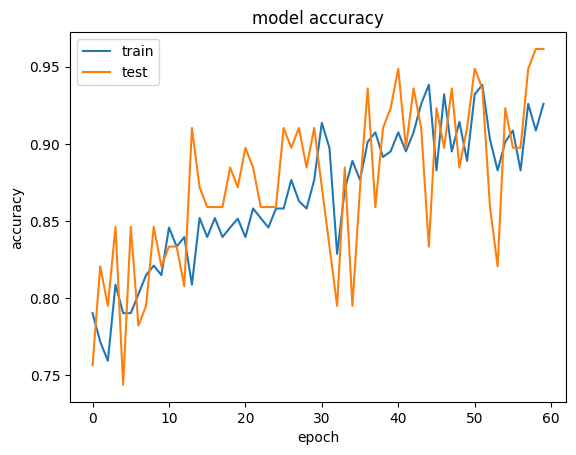

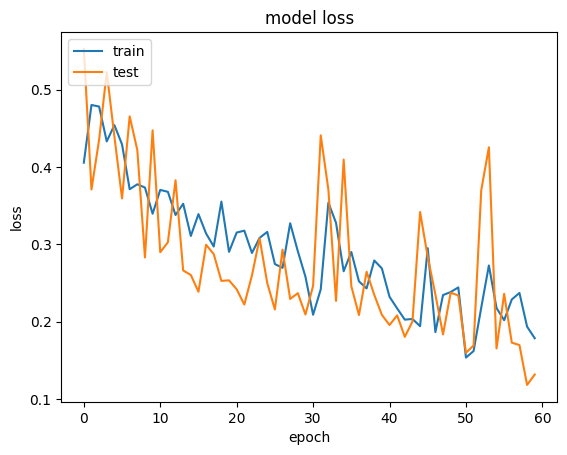

In [29]:
# visualizing the training and validation accuracy and loss over epochs
#plots the training and validation accuracy over epochs
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history['accuracy'])#accuracy values obtained during training epochs.
plt.plot(history.history['val_accuracy'])#accuracy values obtained during validation epochs.
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#plots the training and validation loss over epochs
plt.plot(history.history['loss'])#loss values obtained during training epochs
plt.plot(history.history['val_loss'])#loss values obtained during validation epochs
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [30]:
#to evaluate the trained model on a given dataset,verbose=0 is set to suppress any progress bars or verbose output during evaluation.
score=model.evaluate(validation_generator,verbose=0)
print("Accuracy :%2f%%"%(score[1]*100))#prints the accuracy of the model on the validation dataset.
#score[1] retrieves the accuracy value from the evaluation result stored in the score variable.Multiplying by 100 converts the accuracy value to a percentage.
#"Accuracy: %.2f%%" % (score[1] * 100) is a string formatting operation that inserts the accuracy value into the string with two decimal places followed by a percentage sign.

Accuracy :96.153843%


In [31]:
#Loss Percentage
error_rate = 100 - (score[1]*100)
print("Loss Percentage:%2f%%"%error_rate)

Loss Percentage:3.846157%


1/1 [==============================] - 0s 57ms/step
Prediction: defective fabric


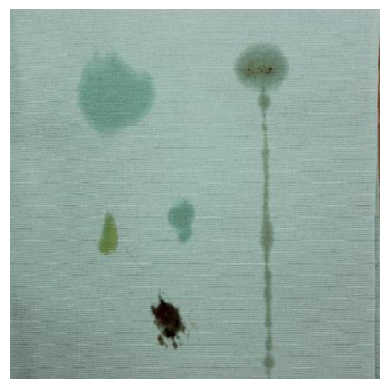

In [49]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and preprocess the image
img_path = "/content/drive/MyDrive/research_pro/own/test/defect/leke-281-_jpg.rf.ca0d29be89ef15050bcc2ccd18bfcbdf.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
result = model.predict(img_array)

# Interpret the prediction
if result[0][0] >= 0.5:#0.5-natural decision boundary for a sigmoid output;threshold for sigmoid activation with binary classification
    prediction = "good fabric"
else:
    prediction = "defective fabric"

# Display the prediction
print('Prediction:', prediction)

# Display the image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()
